In [ ]:
import pandas as pd
# importing csv module
import csv
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('drive/MyDrive/nlp_lab_Madhu/Toddler.csv')
#print(df)
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
column1=df.columns
print(column1)

Index(['Case_0', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_0                  1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

DATA PREPROCESSING:

In [ ]:
#Age_mons , Qchat-10-Score , Jaundice, Family_mem_with_ASD
keys1=list(df.keys())
print(keys1)

['Case_0', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits ']


In [ ]:
keys2=[]
keys2.append('Age_Mons')
keys2.append('Qchat-10-Score')
keys2.append('Jaundice')
keys2.append('Family_mem_with_ASD')

In [ ]:
print(keys2)

['Age_Mons', 'Qchat-10-Score', 'Jaundice', 'Family_mem_with_ASD']


In [ ]:
#this step not needed
#check if any NaN values are missed out.
nan_count_in_column1=[]
print("No of nan values in the dataset: ")
for i in keys2:
  nan_count_in_column1.append(df[i].isna().sum())
  print(i+":"+str(nan_count_in_column1[-1]))

No of nan values in the dataset: 
Age_Mons:0
Qchat-10-Score:0
Jaundice:0
Family_mem_with_ASD:0


In [ ]:
columns_to_drop = ['Case_0', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Sex', 'Ethnicity', 'Who completed the test']
new_df1 = df.drop(columns=columns_to_drop)

In [ ]:
new_df1.describe()

,Age_Mons,Qchat-10-Score,Jaundice,Family_mem_with_ASD,Class/ASD Traits
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,27.867173,5.212524,0.273245,0.161290,0.690702
std,7.980354,2.907304,0.445837,0.367973,0.462424
min,12.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,3.000000,0.000000,0.000000,0.000000
50%,30.000000,5.000000,0.000000,0.000000,1.000000
75%,36.000000,8.000000,1.000000,0.000000,1.000000
max,36.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Age_Mons             1054 non-null   int64
 1   Qchat-10-Score       1054 non-null   int64
 2   Jaundice             1054 non-null   int64
 3   Family_mem_with_ASD  1054 non-null   int64
 4   Class/ASD Traits     1054 non-null   int64
dtypes: int64(5)
memory usage: 41.3 KB


In [ ]:
# Converting object data type to numeric
def convert_to_numeric(df):
    num_col = df.shape[1]
    # Start from index 3
    for index in range(3, num_col):
        col_name = df.iloc[:, index].name
        df[col_name] = pd.to_numeric(df[col_name], errors="coerce")
    return df

new_df2= convert_to_numeric(new_df1)
new_df2.dtypes

Age_Mons               int64
Qchat-10-Score         int64
Jaundice               int64
Family_mem_with_ASD    int64
Class/ASD Traits       int64
dtype: object

In [ ]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Age_Mons             1054 non-null   int64
 1   Qchat-10-Score       1054 non-null   int64
 2   Jaundice             1054 non-null   int64
 3   Family_mem_with_ASD  1054 non-null   int64
 4   Class/ASD Traits     1054 non-null   int64
dtypes: int64(5)
memory usage: 41.3 KB


SMOTE:

In [ ]:
#count the no of instances for each class
class_counts = new_df1['Class/ASD Traits '].value_counts()
# Display the counts
print("Class counts:")
print(class_counts)

sum1=sum(class_counts)
print(sum1) #this cross checks if all the labels are included by summing the counts

Class counts:
Class/ASD Traits 
1    728
0    326
Name: count, dtype: int64
1054


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

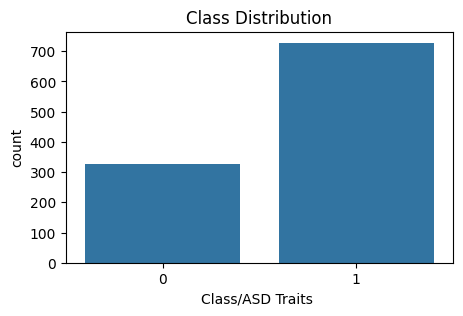

In [ ]:
# Bar plot
plt.figure(figsize=(5,3))
sns.countplot(x='Class/ASD Traits ', data=new_df2)
plt.title('Class Distribution')
plt.show()

In [ ]:
pip install imbalanced-learn #no need of this line

In [ ]:
X=new_df1.drop('Class/ASD Traits ',axis=1)
y=new_df1['Class/ASD Traits ']
from imblearn.over_sampling import SMOTE
# Create an instance of SMOTE with the specified sampling_strategy
smote = SMOTE(sampling_strategy='auto', random_state=42)
n_neighbors = min(3, len(X)-1)

# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = SMOTE(random_state=42, k_neighbors=n_neighbors).fit_resample(X,y)

print(X_resampled)
print(y_resampled)

      Age_Mons  Qchat-10-Score  Jaundice  Family_mem_with_ASD
0           28               3         1                    0
1           36               4         1                    0
2           36               4         1                    0
3           24              10         0                    0
4           20               9         0                    1
...        ...             ...       ...                  ...
1451        20               3         0                    0
1452        12               2         0                    0
1453        36               2         0                    0
1454        12               1         0                    0
1455        36               0         0                    0

[1456 rows x 4 columns]
0       0
1       1
2       1
3       1
4       1
       ..
1451    0
1452    0
1453    0
1454    0
1455    0
Name: Class/ASD Traits , Length: 1456, dtype: int64


In [ ]:
target=new_df1['Class/ASD Traits ']
print('Original sample:',np.unique(target,return_counts=True))
print("After SMOTE:",np.unique(y_resampled,return_counts=True))
len(y_resampled)
#print(len(new_df2))

Original sample: (array([0, 1]), array([326, 728]))
After SMOTE: (array([0, 1]), array([728, 728]))


1456

In [ ]:

X_train_resampled = pd.DataFrame(X_resampled, columns=keys2)
y_train_resampled= pd.DataFrame(y_resampled, columns=['Class/ASD Traits '])

new_df3= pd.concat([X_train_resampled, y_train_resampled], axis=1)
new_df3.describe()
#print(len(new_df3))

,Age_Mons,Qchat-10-Score,Jaundice,Family_mem_with_ASD,Class/ASD Traits
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,27.660714,4.235577,0.241758,0.149725,0.500000
std,8.258387,2.985440,0.428296,0.356925,0.500172
min,12.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,2.000000,0.000000,0.000000,0.000000
50%,30.000000,3.500000,0.000000,0.000000,0.500000
75%,36.000000,7.000000,0.000000,0.000000,1.000000
max,36.000000,10.000000,1.000000,1.000000,1.000000


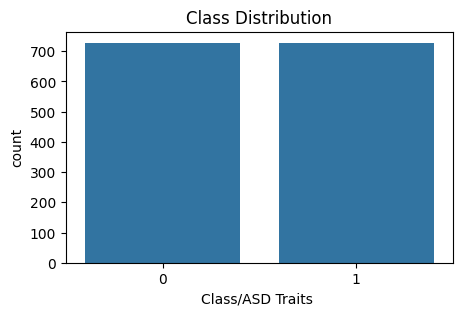

In [ ]:
# Bar plot
#after performing SMOTE alogorithm
plt.figure(figsize=(5,3))
sns.countplot(x='Class/ASD Traits ', data=new_df3)
plt.title('Class Distribution')
plt.show()

Here there are 4 features, using which we are going to find the dependent variable: Class

Data splitting:

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

In [ ]:
#Data splitting
from sklearn.model_selection import train_test_split
X=new_df3.drop('Class/ASD Traits ',axis=1)
y=new_df3['Class/ASD Traits ']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


Models implementations:

In [ ]:
#rf
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100,
                                       criterion='gini',
                                       max_depth=None,
                                       min_samples_split=2,
                                       min_samples_leaf=1,
                                       min_weight_fraction_leaf=0,
                                       #max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0,
                                       bootstrap=True,
                                       oob_score=False,
                                       n_jobs=None,
                                       random_state=None,
                                       verbose=0,
                                       warm_start=False,
                                       class_weight=None,
                                       ccp_alpha=0,
                                       max_samples=None)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Calculate evaluation metrics
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

# Print the evaluation metrics
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)
print("Accuracy:", accuracy)


F1 Score: 1.0
Recall: 1.0
Precision: 1.0
Accuracy: 1.0


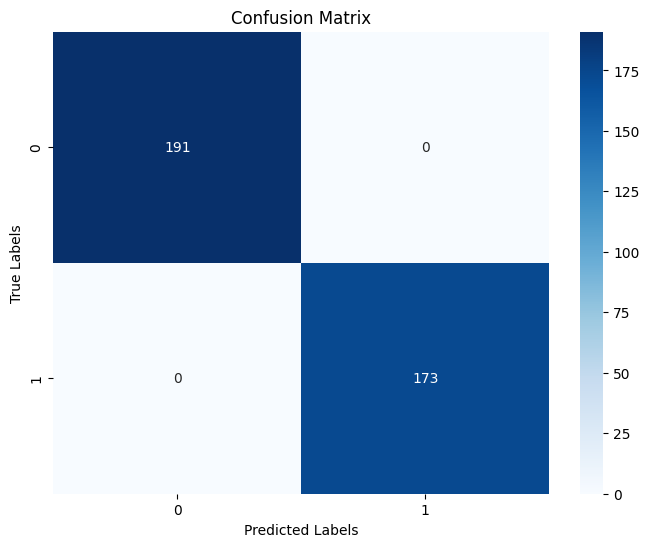

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
#print("Confusion Matrix:")
#print(cm)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:
#svm
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVM classifier
svm_classifier = SVC(C=1,
                     kernel='rbf',
                     degree=3,
                     gamma='scale',
                     coef0=0,
                     shrinking=True,
                     probability=False,
                     tol=0.001,
                     cache_size=200,
                     class_weight=None,
                     verbose=False,
                     #max_iter=1,
                     decision_function_shape='ovr',
                     break_ties=False,
                     random_state=None)  # You can change the kernel as needed (e.g., 'linear', 'rbf', 'poly')

# Train classifier
svm_classifier.fit(X_train, y_train)

# Predict on test data
y_pred = svm_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9931506849315068
Precision: 0.99324200913242
Recall: 0.9931506849315068
F1 Score: 0.9931497205561745


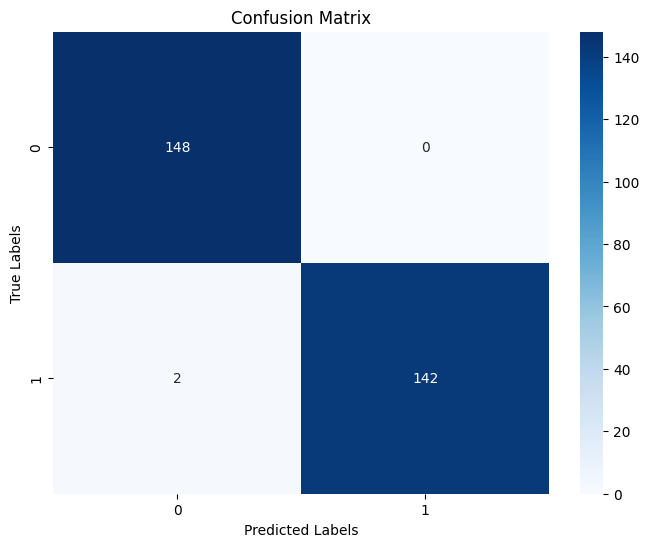

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
#print("Confusion Matrix:")
#print(cm)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:
#lr
from sklearn.linear_model import LogisticRegression

log_reg_classifier = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1, fit_intercept=True,
                                   intercept_scaling=1, class_weight=None, random_state=None,
                                    solver='lbfgs',max_iter=1000, multi_class='auto', verbose=0,
                                   warm_start=False, n_jobs=None, l1_ratio=None)

log_reg_classifier.fit(X_train, y_train)
y_pred = log_reg_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


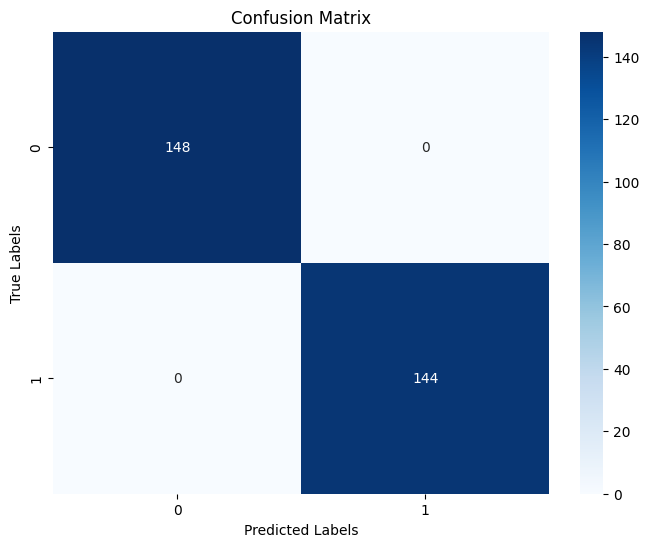

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
#print("Confusion Matrix:")
#print(cm)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:
pip install xgboost

In [ ]:
#xgboost
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(booster='gbtree',
                                verbosity=1,
                                validate_parameters=False,
                                disable_default_eval_metric=False)

# Fit the classifier to your training data
xgb_classifier.fit(X_train, y_train)


# Predict on test data
y_pred = xgb_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Test Accuracy:", accuracy)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Test Accuracy: 1.0


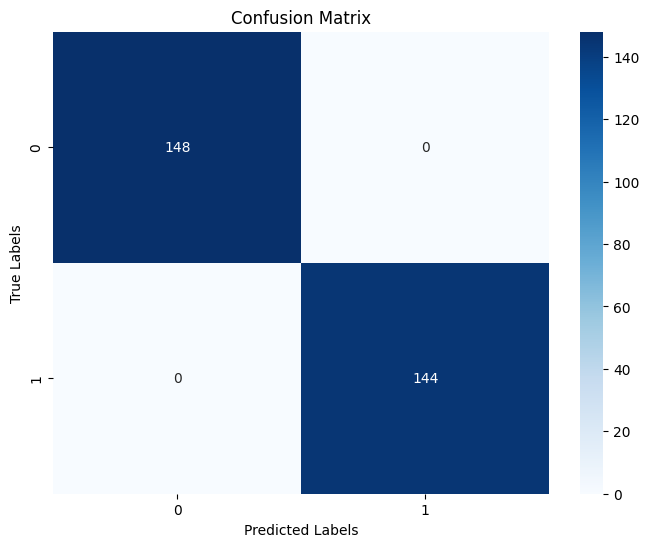

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
#print("Confusion Matrix:")
#print(cm)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier


# Create a DecisionTreeClassifier with specified parameters
decision_tree_classifier = DecisionTreeClassifier(criterion='gini',
                                                  splitter='best',
                                                  max_depth=None,
                                                  min_samples_split=2,
                                                  min_samples_leaf=1,
                                                  min_weight_fraction_leaf=0,
                                                  max_features=None,
                                                  random_state=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0,
                                                  class_weight=None,
                                                  ccp_alpha=0)

# Fit the classifier to your training data
decision_tree_classifier.fit(X_train, y_train)

# Predict on test data
y_pred = xgb_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Test Accuracy:", accuracy)

Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Test Accuracy: 1.0


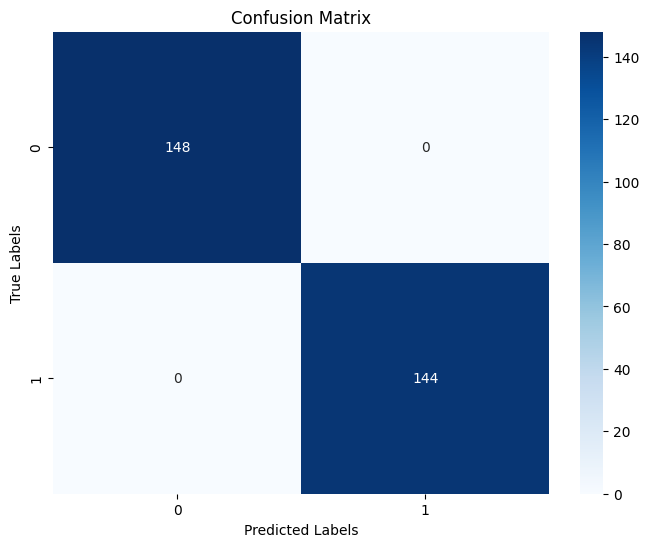

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
#print("Confusion Matrix:")
#print(cm)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:
pip install catboost

In [ ]:
#catboost
from catboost import CatBoostClassifier
catboost_classifier = CatBoostClassifier(iterations=10,
                                         learning_rate=0.1,
                                         depth=2,
                                         loss_function='MultiClass')
# Fit the classifier to your training data
catboost_classifier.fit(X_train, y_train)

# Predict on test data
y_pred = xgb_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Test Accuracy:", accuracy)


0:	learn: 0.5995088	total: 3.81ms	remaining: 34.3ms
1:	learn: 0.5229473	total: 7.55ms	remaining: 30.2ms
2:	learn: 0.4586016	total: 11.7ms	remaining: 27.3ms
3:	learn: 0.4041394	total: 12.4ms	remaining: 18.6ms
4:	learn: 0.3575525	total: 16.9ms	remaining: 16.9ms
5:	learn: 0.3173743	total: 19.4ms	remaining: 12.9ms
6:	learn: 0.2824963	total: 20.9ms	remaining: 8.96ms
7:	learn: 0.2520404	total: 21.5ms	remaining: 5.37ms
8:	learn: 0.2253366	total: 22ms	remaining: 2.44ms
9:	learn: 0.2018163	total: 33.2ms	remaining: 0us
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Test Accuracy: 1.0


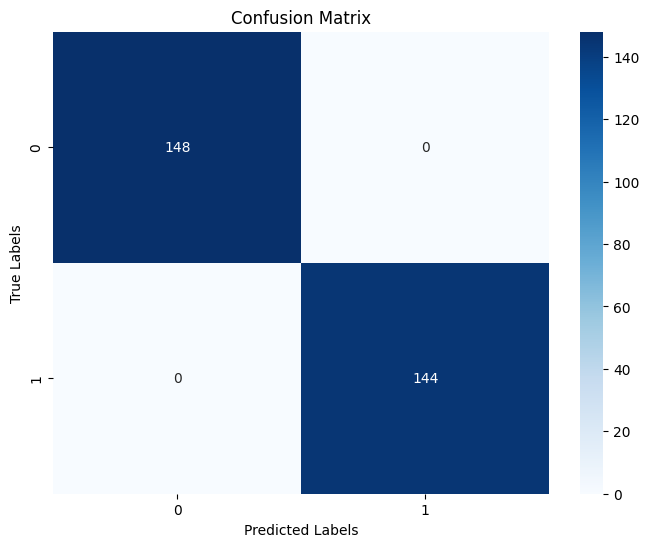

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
#print("Confusion Matrix:")
#print(cm)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:
#mlp
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an MLP classifier with specified parameters
mlp = MLPClassifier(hidden_layer_sizes=100,
                    activation='relu',
                    solver='adam',
                    alpha=0.0001,
                    batch_size='auto',
                    learning_rate='constant',
                    learning_rate_init=0.001,
                    power_t=0.5,
                    max_iter=200,
                    shuffle=True,
                    random_state=None,
                    tol=0.0001,
                    verbose=False,
                    warm_start=False,
                    momentum=0.9,
                    nesterovs_momentum=True,
                    early_stopping=False,
                    validation_fraction=0.1,
                    beta_1=0.9,
                    beta_2=0.999,
                    epsilon=1e-8,
                    n_iter_no_change=10,
                    max_fun=15000)

# Train the MLP classifier
mlp.fit(X_train, y_train)

# Predict on the testing set
y_pred = mlp.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Test Accuracy:", accuracy)


Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Test Accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


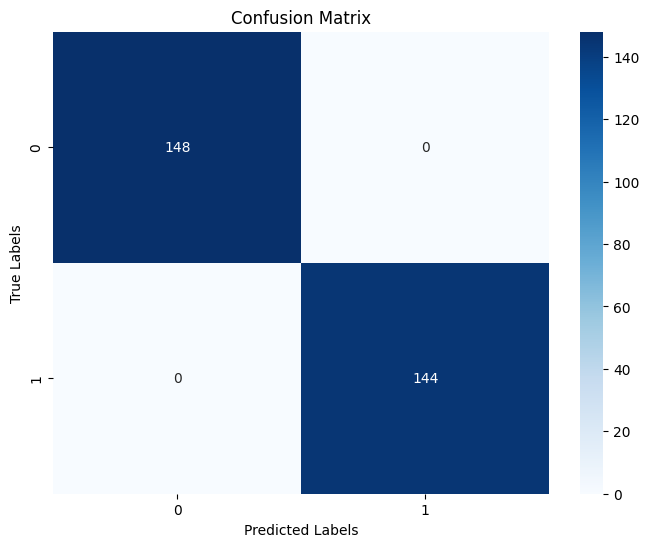

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
#print("Confusion Matrix:")
#print(cm)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
